In [62]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import pymongo
from matplotlib import pyplot as plt
import cPickle

In [2]:
# import MongoDB mashable article collection to pandas dataframe
connection = pymongo.MongoClient()
db = connection.mashable
input_data = db.articles
data = pd.DataFrame(list(input_data.find()))

In [3]:
data.columns

Index([u'LDA_0_prob', u'LDA_1_prob', u'LDA_2_prob', u'LDA_3_prob',
       u'LDA_4_prob', u'LDA_5_prob', u'LDA_6_prob', u'LDA_7_prob',
       u'LDA_8_prob', u'LDA_9_prob', u'_id', u'average_token_length_content',
       u'average_token_length_title', u'avg_negative_polarity',
       u'avg_positive_polarity', u'content', u'data_channel_is_bus',
       u'data_channel_is_entertainment', u'data_channel_is_lifestyle',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'global_grade_level',
       u'global_rate_negative_words', u'global_rate_positive_words',
       u'global_reading_ease', u'global_sentiment_abs_polarity',
       u'global_sentiment_polarity', u'global_subjectivity', u'is_weekend',
       u'max_abs_polarity', u'max_negative_polarity', u'max_positive_polarity',
       u'min_negative_polarity', u'min_positive_polarity', u'n_tokens_content',
       u'n_tokens_title', u'num_imgs', u'num_tags', u'num_videos',
       u'r_non_stop_unique_token

In [4]:
# drop extraneous data
data.drop(['url', 'content', 'title', '_id'], 
          axis=1, 
          inplace = True)

In [5]:
data.shares.describe()

count     39494.000000
mean       3391.845951
std       11619.594985
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [6]:
def drange(start, stop, step):
    
    """
    produce a list of numbers in a range by sny type of step
    
    arguements:
    start -- begining of range, int or float
    stop -- end of range, int or float
    step -- interval between each point in range, int or float
    
    returns:
    generator object to create list
    """
    
    r = start
    while r < stop:
        yield r
        r += step

In [7]:
percentiles = [x for x in drange(0, 1, 0.05)] + [x for x in drange(.96, 1, 0.005)] + [x for x in drange(.9955, 1, 0.0005)]

In [8]:
for q in percentiles:
    print str(q*100) + 'th Percentile: ' + str(data.shares.quantile(q))

0th Percentile: 1.0
5.0th Percentile: 584.0
10.0th Percentile: 708.0
15.0th Percentile: 792.0
20.0th Percentile: 870.0
25.0th Percentile: 946.0
30.0th Percentile: 1000.0
35.0th Percentile: 1100.0
40.0th Percentile: 1200.0
45.0th Percentile: 1300.0
50.0th Percentile: 1400.0
55.0th Percentile: 1600.0
60.0th Percentile: 1800.0
65.0th Percentile: 2000.0
70.0th Percentile: 2300.0
75.0th Percentile: 2800.0
80.0th Percentile: 3400.0
85.0th Percentile: 4400.0
90.0th Percentile: 6200.0
95.0th Percentile: 10800.0
96.0th Percentile: 12700.0
96.5th Percentile: 14000.0
97.0th Percentile: 15721.0
97.5th Percentile: 17600.0
98.0th Percentile: 20414.0
98.5th Percentile: 24460.5
99.0th Percentile: 31600.0
99.5th Percentile: 50200.0
99.55th Percentile: 53128.15
99.6th Percentile: 56402.8
99.65th Percentile: 59942.15
99.7th Percentile: 67004.2
99.75th Percentile: 72314.0
99.8th Percentile: 83321.0
99.85th Percentile: 97808.4
99.9th Percentile: 113157.7
99.95th Percentile: 183844.8
100.0th Percentile: 843

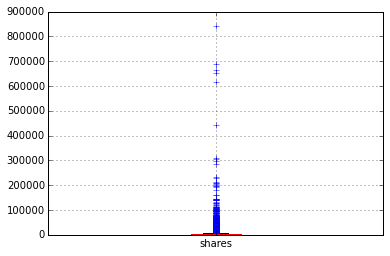

In [9]:
data.boxplot(column='shares', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1276d5490>]], dtype=object)

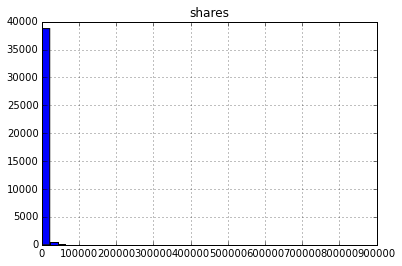

In [10]:
data.hist(column='shares', bins = 40)

In [11]:
data = data[data.shares <= 10800.0]

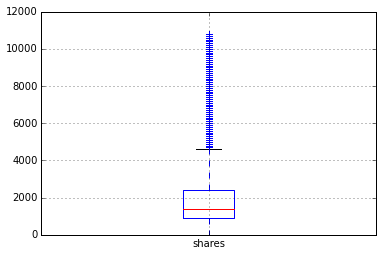

In [12]:
data.boxplot(column='shares', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121164910>]], dtype=object)

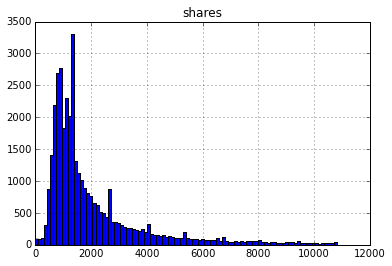

In [13]:
data.hist(column='shares', bins = 100)

In [14]:
for q in percentiles:
    print str(q*100) + 'th Percentile: ' + str(data.shares.quantile(q))

0th Percentile: 1.0
5.0th Percentile: 577.0
10.0th Percentile: 699.0
15.0th Percentile: 781.0
20.0th Percentile: 855.0
25.0th Percentile: 927.0
30.0th Percentile: 1000.0
35.0th Percentile: 1100.0
40.0th Percentile: 1200.0
45.0th Percentile: 1300.0
50.0th Percentile: 1400.0
55.0th Percentile: 1500.0
60.0th Percentile: 1700.0
65.0th Percentile: 1900.0
70.0th Percentile: 2100.0
75.0th Percentile: 2400.0
80.0th Percentile: 2900.0
85.0th Percentile: 3500.0
90.0th Percentile: 4500.0
95.0th Percentile: 6400.0
96.0th Percentile: 6900.0
96.5th Percentile: 7300.0
97.0th Percentile: 7600.0
97.5th Percentile: 8000.0
98.0th Percentile: 8400.0
98.5th Percentile: 9000.0
99.0th Percentile: 9500.0
99.5th Percentile: 10100.0
99.55th Percentile: 10200.0
99.6th Percentile: 10300.0
99.65th Percentile: 10300.0
99.7th Percentile: 10400.0
99.75th Percentile: 10500.0
99.8th Percentile: 10500.0
99.85th Percentile: 10600.0
99.9th Percentile: 10700.0
99.95th Percentile: 10723.95
100.0th Percentile: 10800.0


In [15]:
len(data)/39545

0.9488430901504615

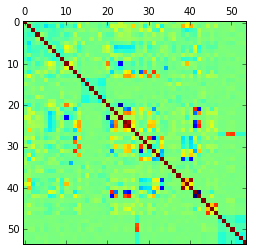

In [16]:
plt.matshow(data.corr())

In [17]:
len(data.drop('shares', axis=1).columns)

53

### Predict Count

#### GLM -- Poisson

In [18]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold, train_test_split

In [19]:
X = sm.add_constant(data.drop('shares', axis=1))
y = data.shares

In [20]:
y_train, y_test, X_train, X_test = train_test_split(y, X, random_state = 515)

In [21]:
pois_model = sm.GLM(y_train, 
                    X_train, 
                    family=sm.families.Poisson(link=sm.genmod.families.links.log))
pois_results = pois_model.fit()

In [22]:
pois_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 shares   No. Observations:                28141
Model:                            GLM   Df Residuals:                    28090
Model Family:                 Poisson   Df Model:                           50
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.7041e+07
Date:                Mon, 07 Dec 2015   Deviance:                   3.3823e+07
Time:                        11:12:26   Pearson chi2:                 4.52e+07
No. Iterations:                   100                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                             5.5008      0.037    149.163      0.000         5.429     5.573
LDA_0_prob                        0.7962      0.041     19.535      0.000         0.716     0.876
LDA_1_prob                        0.8634      0.041     21.157      0.000         0.783     0.943
LDA_2_prob                        0.9130      0.041     22.396      0.000         0.833     0.993
LDA_3_prob                        0.7270      0.041     17.796      0.000         0.647     0.807
LDA_4_prob                        0.9181      0.041     22.515      0.000         0.838     0.998
LDA_5_prob                        0.8105      0.041     19.866      0.000         0.730     0.890
LDA_6_prob                        0.8432      0.041     20.665      0.000         0.763     0.923
LDA_7_prob                        0.8840      0.041     21.664      0.000         0.804     0.964
LDA_8_prob                        0.9134      0.041     22.396      0.000         0.833     0.993
LDA_9_prob                        0.9494      0.041     23.256      0.000         0.869     1.029
average_token_length_content      0.0252      0.001     28.740      0.000         0.024     0.027
average_token_length_title       -0.0009      0.000     -5.075      0.000        -0.001    -0.001
avg_negative_polarity             0.0072      0.003      2.473      0.013         0.001     0.013
avg_positive_polarity             0.1086      0.003     34.789      0.000         0.103     0.115
data_channel_is_bus              -0.2027      0.000   -426.330      0.000        -0.204    -0.202
data_channel_is_entertainment    -0.3771      0.000   -817.333      0.000        -0.378    -0.376
data_channel_is_lifestyle        -0.1209      0.001   -188.802      0.000        -0.122    -0.120
data_channel_is_socmed            0.0565      0.001     96.819      0.000         0.055     0.058
data_channel_is_tech             -0.0647      0.000   -147.236      0.000        -0.066    -0.064
data_channel_is_world            -0.4000      0.000   -872.539      0.000        -0.401    -0.399
global_grade_level               -0.0019      0.000    -10.477      0.000        -0.002    -0.002
global_rate_negative_words       -0.3187      0.031    -10.419      0.000        -0.379    -0.259
global_rate_positive_words        0.5360      0.016     34.560      0.000         0.506     0.566
global_reading_ease              -0.0003   4.83e-05     -5.853      0.000        -0.000    -0.000
global_sentiment_abs_polarity    -0.0038      0.004     -1.034      0.301        -0.011     0.003
global_sentiment_polarity        -0.2091      0.005    -44.362      0.000        -0.218    -0.200
global_subjectivity               0.0495      0.002     25.743      0.000         0.046     0.053
is_weekend                        0.7777      0.004    179.135      0.000         0.769     0.786
max_abs_polarity          

In [63]:
with open('pois_regress.pkl', 'wb') as f:
    cPickle.dump(pois_results, f)

In [23]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chisqprob

In [24]:
# test for significance
pois_results.null_deviance

36183621.296935052

In [25]:
diff_in_dev = pois_results.null_deviance - pois_results.deviance
diff_in_dev

2360631.304935351

In [26]:
df = pois_results.df_model
df

50

In [27]:
chisqprob(diff_in_dev , df)

0.0

In [28]:
# train error
mean_squared_error(pois_results.predict(X_train),y_train)

3366771.0114277382

In [29]:
# test error
mean_squared_error(pois_results.predict(X_test),y_test)

3213068.6619217824

#### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [31]:
# train random forest regressor
RF_regress = RandomForestRegressor(n_estimators=100, 
                                   max_depth=5, 
                                   max_features='sqrt', 
                                   bootstrap=True, 
                                   oob_score=True, 
                                   n_jobs=-1, 
                                   random_state=515, 
                                   verbose=1)
RF_regress.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=515,
           verbose=1, warm_start=False)

In [32]:
mean_squared_error(RF_regress.predict(X_train),y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


3366709.4549498381

In [33]:
mean_squared_error(RF_regress.predict(X_test),y_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


3267196.8216145039

In [34]:
sorted(zip(RF_regress.feature_importances_,X_train.columns), reverse=True)

[(0.12445973959853271, u'data_channel_is_world'),
 (0.11714193624508143, u'num_imgs'),
 (0.091025822370877543, u'is_weekend'),
 (0.08881416578382291, u'data_channel_is_entertainment'),
 (0.0675571346508506, u'data_channel_is_socmed'),
 (0.039899487480916408, u'weekday_is_saturday'),
 (0.036416297992098147, u'weekday_is_sunday'),
 (0.032353171828102323, u'data_channel_is_tech'),
 (0.024718246126449045, u'num_videos'),
 (0.018812721070246185, u'r_non_stop_words'),
 (0.018579371564071637, u'n_tokens_content'),
 (0.018364605644231216, u'r_unique_tokens'),
 (0.018225507654223486, u'global_rate_positive_words'),
 (0.016924579693492526, u'r_non_stop_unique_tokens'),
 (0.013718927982548108, u'LDA_9_prob'),
 (0.013207764104572943, u'average_token_length_content'),
 (0.012695831658657066, u'LDA_1_prob'),
 (0.012058072285446628, u'global_rate_negative_words'),
 (0.01200317602709833, u'global_sentiment_abs_polarity'),
 (0.011747619352915493, u'LDA_5_prob'),
 (0.011466655514803588, u'average_token_

In [35]:
# Analyze Individual Features
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydot

In [36]:
DT_num_imgs = DecisionTreeRegressor(max_depth=2)
DT_num_imgs.fit(X_train['num_imgs'].reshape(-1, 1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [37]:
dot_data = StringIO() 
export_graphviz(DT_num_imgs,out_file='num_img_tree.dot',feature_names='num_imgs')
!dot -Tpng num_img_tree.dot -o num_img_tree.png

<img src="num_img_tree.png">

In [38]:
DT_is_weekend = DecisionTreeRegressor(max_depth=2)
DT_is_weekend.fit(X_train['is_weekend'].reshape(-1, 1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [39]:
dot_data = StringIO() 
export_graphviz(DT_is_weekend,out_file='is_weekend.dot',feature_names='is_weekend')
!dot -Tpng is_weekend.dot -o is_weekend.png

<img src="is_weekend.png">

In [40]:
DT_n_tokens_content= DecisionTreeRegressor(max_depth=2, min_samples_leaf = 1000)
DT_n_tokens_content.fit(X_train['n_tokens_content'].reshape(-1, 1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [41]:
dot_data = StringIO() 
export_graphviz(DT_n_tokens_content,out_file='n_tokens_content.dot',feature_names='n_tokens_content')
!dot -Tpng n_tokens_content.dot -o n_tokens_content.png

<img src="n_tokens_content.png">

In [42]:
DT_global_rate_positive_words= DecisionTreeRegressor(max_depth=2, min_samples_leaf = 1000)
DT_global_rate_positive_words.fit(X_train['global_rate_positive_words'].reshape(-1, 1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [43]:
dot_data = StringIO() 
export_graphviz(DT_global_rate_positive_words,out_file='global_rate_positive_words.dot',feature_names='global_rate_positive_words')
!dot -Tpng global_rate_positive_words.dot -o global_rate_positive_words.png

<img src="global_rate_positive_words.png">

#### Random Forest Classification (Top 10%, above 4500 shares)

In [44]:
# define class for classification problem
y_train_class = [1 if shares > 4500 else 0 for shares in y_train]
y_test_class = [1 if shares > 4500 else 0 for shares in y_test]

In [45]:
# grid search for weights
from sklearn.grid_search import GridSearchCV

RF_class = RandomForestClassifier()
params = {"n_estimators": [100],
          "max_depth": [5],
          "max_features": ['sqrt'],
          "bootstrap": [True],
          "n_jobs": [-1],
          "random_state": [515],
          "verbose": [1],
          "class_weight": [{0: .1, 1: .9},
                           {0: .15, 1: .85},
                           {0: .2, 1: .8},
                           {0: .25, 1: .75},
                           {0: .3, 1: .7},
                           {0: .35, 1: .65}]}

gs = GridSearchCV(RF_class, params, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train_class)

print gs.best_estimator_.get_params()

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]

{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 1, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 515, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': {0: 0.2, 1: 0.8}}


In [46]:
RF_class = RandomForestClassifier(n_estimators=100, 
                                   max_depth=5, 
                                   max_features='sqrt', 
                                   bootstrap=True, 
                                   n_jobs=-1, 
                                   random_state=515, 
                                   verbose=1,
                                   class_weight = {0: .1, 1: .9})
RF_class.fit(X_train, y_train_class)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=5, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=515, verbose=1, warm_start=False)

In [64]:
with open('rf_class.pkl', 'wb') as f:
    cPickle.dump(RF_class, f)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print classification_report(RF_class.predict(X_train),y_train_class)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


             precision    recall  f1-score   support

          0       0.67      0.94      0.78     18064
          1       0.62      0.17      0.27     10077

avg / total       0.65      0.67      0.60     28141



In [49]:
sorted(zip(RF_class.feature_importances_,X_train.columns), reverse=True)

[(0.1471187603345962, u'data_channel_is_world'),
 (0.11037205663132164, u'num_imgs'),
 (0.048269291879793556, u'data_channel_is_entertainment'),
 (0.040016565234216796, u'num_videos'),
 (0.034688492333863875, u'is_weekend'),
 (0.029383681899013671, u'data_channel_is_socmed'),
 (0.026727357325257516, u'global_subjectivity'),
 (0.026495371915981562, u'weekday_is_sunday'),
 (0.025797890976048437, u'global_sentiment_abs_polarity'),
 (0.025723910143998038, u'global_rate_positive_words'),
 (0.024823538850300138, u'n_tokens_content'),
 (0.021336407626349026, u'average_token_length_content'),
 (0.020264691296129164, u'r_non_stop_words'),
 (0.01949835307936815, u'r_non_stop_unique_tokens'),
 (0.019177335528688728, u'r_unique_tokens'),
 (0.019123982388391188, u'average_token_length_title'),
 (0.018836454926284715, u'LDA_3_prob'),
 (0.018337714334259712, u'LDA_1_prob'),
 (0.017201828923908608, u'avg_positive_polarity'),
 (0.017135481299143197, u'avg_negative_polarity'),
 (0.015658438339035269, u'

In [50]:
DT_global_subjectivity = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2000, class_weight = {0: .1, 1: .9})
DT_global_subjectivity.fit(X_train['global_subjectivity'].reshape(-1, 1), y_train_class)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=2000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
dot_data = StringIO() 
export_graphviz(DT_global_subjectivity,out_file='global_subjectivity.dot',feature_names='global_subjectivity')
!dot -Tpng global_subjectivity.dot -o global_subjectivity.png

<img src="global_subjectivity.png">